# CASE STUDY-1


# 1. Introduction

<h2> 1.1 Business Problem</h2>

In the present system, the e-commerce platform will send a feedback mail to customers after the product is delivered. The customers can give ratings out of 5, also can write down some comments/reviews about the product that he/she has purchased. Using these reviews and ratings, e-commerce platform will rate the products, which helps other people to get the insights about the quality of the product. But according to seller perspective, these reviews will play crucial role to improve the business. But many times, customers would not give any ratings or reviews. How to predict the review score that a customer could give? This is the problem in e-commerce business. Also, the problem can be extended as “Is it possible to predict the review rating that a customer could give before actually he gives the rating?”. If this problem is solved, then it is also possible to predict the rating for which customer had not given any rating. In this case study, my objective is to try to solve this problem, that is Predicting the e-commerce customer satisfaction.


For this case study, I have taken the dataset given by Olist, which is an e-commerce platform in Brazil. Olist connects small businesses all over Brazil to customers with a single contract. Olist has provided over 100k order information that were placed between 2016 to 2018. Similar to all other e-commerce platforms, Olist also send feedback form to customers after the estimated delivery date to get the reviews and ratings. Now, Olist wants to improve the business as well as provide the better service to customers by using the customer satisfaction information. For that it needs to predict the review ratings before the user will give actual ratings. So, my approach is to address this business problem using data science, which is a scientific way to solve this business problem.

<h2> 1.2 ML formulation of business problem:</h2>
To solve the business problem using data science, it is needed to pose that problem as classical machine learning problem. First of all, since the data has target variable, it is supervised ML problem. Further we need to predict the satisfaction of customers, that is predicting the ratings. Ratings are discrete ranging from 1 to 5. Hence it is a multi-class classification problem. We have 5 class labels, So, we can treat the problem as 5-class classification ML problem.
Our goal is to predict the rating before the user give the rating/review. Hence, we should not consider data regarding review message, comments, etc as features.


<h2> 1.3 Business constraints:</h2>

    - There is no strict low latency requirement. But model should not take too much time for predicting, Since we should get the prediction before the user give.
    
    - Low ratings like 1,2,3 are very important with respect to business improvement. So, misclassification of low ratings would cost loss of customers. Hence misclassifications are crucial.
    
    - Since low ratings are crucial, if we get the interpretations of the output, that will be better.

<h2> 1.4 Performance Metrics: (possible)</h2>

- Multi-class confusion matrix
- Micro F1 score
- Precision Recall curve for each class
- Multi-class log loss
- Balanced accuracy score

<h2> 1.5 Research-Papers/Solutions/Architectures/Kernels </h2>

- Existing solution: https://www.kaggle.com/andresionek/predicting-customer-satisfaction
- Repeat buyer prediction for e-commerce https://www.kdd.org/kdd2016/papers/files/adf0160-liuA.pdf
- LightGBM Classifier: https://papers.nips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf
- SMOTE technique: https://arxiv.org/pdf/1106.1813.pdf
- Blog on undersampling, oversampling, SMOTE, ensemble models: https://xang1234.github.io/louvain/
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
- https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
- https://towardsdatascience.com/using-data-science-to-predict-negative-customer-reviews-2abbdfbf3d82

<h1> 2. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import folium

import datetime

<h2> 2.1 Loading the data files</h2>

In [2]:
#loading all csv files
customer     = pd.read_csv("olist_customers_dataset.csv")
geo_location = pd.read_csv("olist_geolocation_dataset.csv")
items        = pd.read_csv("olist_order_items_dataset.csv")
payments     = pd.read_csv("olist_order_payments_dataset.csv")
reviews      = pd.read_csv("olist_order_reviews_dataset.csv")
orders       = pd.read_csv("olist_orders_dataset.csv")
products     = pd.read_csv("olist_products_dataset.csv")
sellers      = pd.read_csv("olist_sellers_dataset.csv")
translation  = pd.read_csv("product_category_name_translation.csv")


In [3]:
def overview(dataframe):
    """This function will return the overview of the dataframe"""
    
    print("Shape of the dataframe is : {}".format(dataframe.shape))
    print("**"*30)
    print("Information about features : ",dataframe.info())
    print("**"*30)
    print("Total number of null values : \n ",dataframe.isnull().sum())
    print("**"*30)
    
    return dataframe.head(3)

## 2.2 Overview of all data

In [4]:
overview(customer)

Shape of the dataframe is : (99441, 5)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Information about features :  None
************************************************************
Total number of null values : 
  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
************************************************************


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
overview(geo_location)

Shape of the dataframe is : (1000163, 5)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Information about features :  None
************************************************************
Total number of null values : 
  geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: in

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [6]:
overview(items)

Shape of the dataframe is : (112650, 7)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Information about features :  None
************************************************************
Total number of null values : 
  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price         

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [7]:
overview(payments)

Shape of the dataframe is : (103886, 5)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Information about features :  None
************************************************************
Total number of null values : 
  order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
************************************************************


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [8]:
overview(reviews)

Shape of the dataframe is : (100000, 7)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Information about features :  None
************************************************************
Total number of null values : 
  review_id                      0
order_id                       0
review_score                   0
review_comment_title      

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [9]:
overview(orders)

Shape of the dataframe is : (99441, 8)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Information about features :  None
************************************************************
Total number of null values : 
  order_id                         

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [10]:
overview(products)

Shape of the dataframe is : (32951, 9)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Information about features :  None
************************************************************
Total number of n

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [11]:
overview(sellers)

Shape of the dataframe is : (3095, 4)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Information about features :  None
************************************************************
Total number of null values : 
  seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
************************************************************


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [12]:
overview(translation)

Shape of the dataframe is : (71, 2)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Information about features :  None
************************************************************
Total number of null values : 
  product_category_name            0
product_category_name_english    0
dtype: int64
************************************************************


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


### Observations:
    * There are null values present in reviews data, orders data, product data. Rest of the dataframes do not have any null values.
    * Translation data has the product category names in english, i.e. english version of product categories. So we can use this to get the product category names in english. 
    * geo_location data has 1000163 data points, which seems very large compare to the data points of other dataframes. There is possibility of duplicate points present in geo_locations.
    * To get the complete informations, we need to merge these sub dataframes to get single dataframe. Merging should be done according to the data schema that is given below.
    

## 2.3 Merge the dataframes

### Data schema
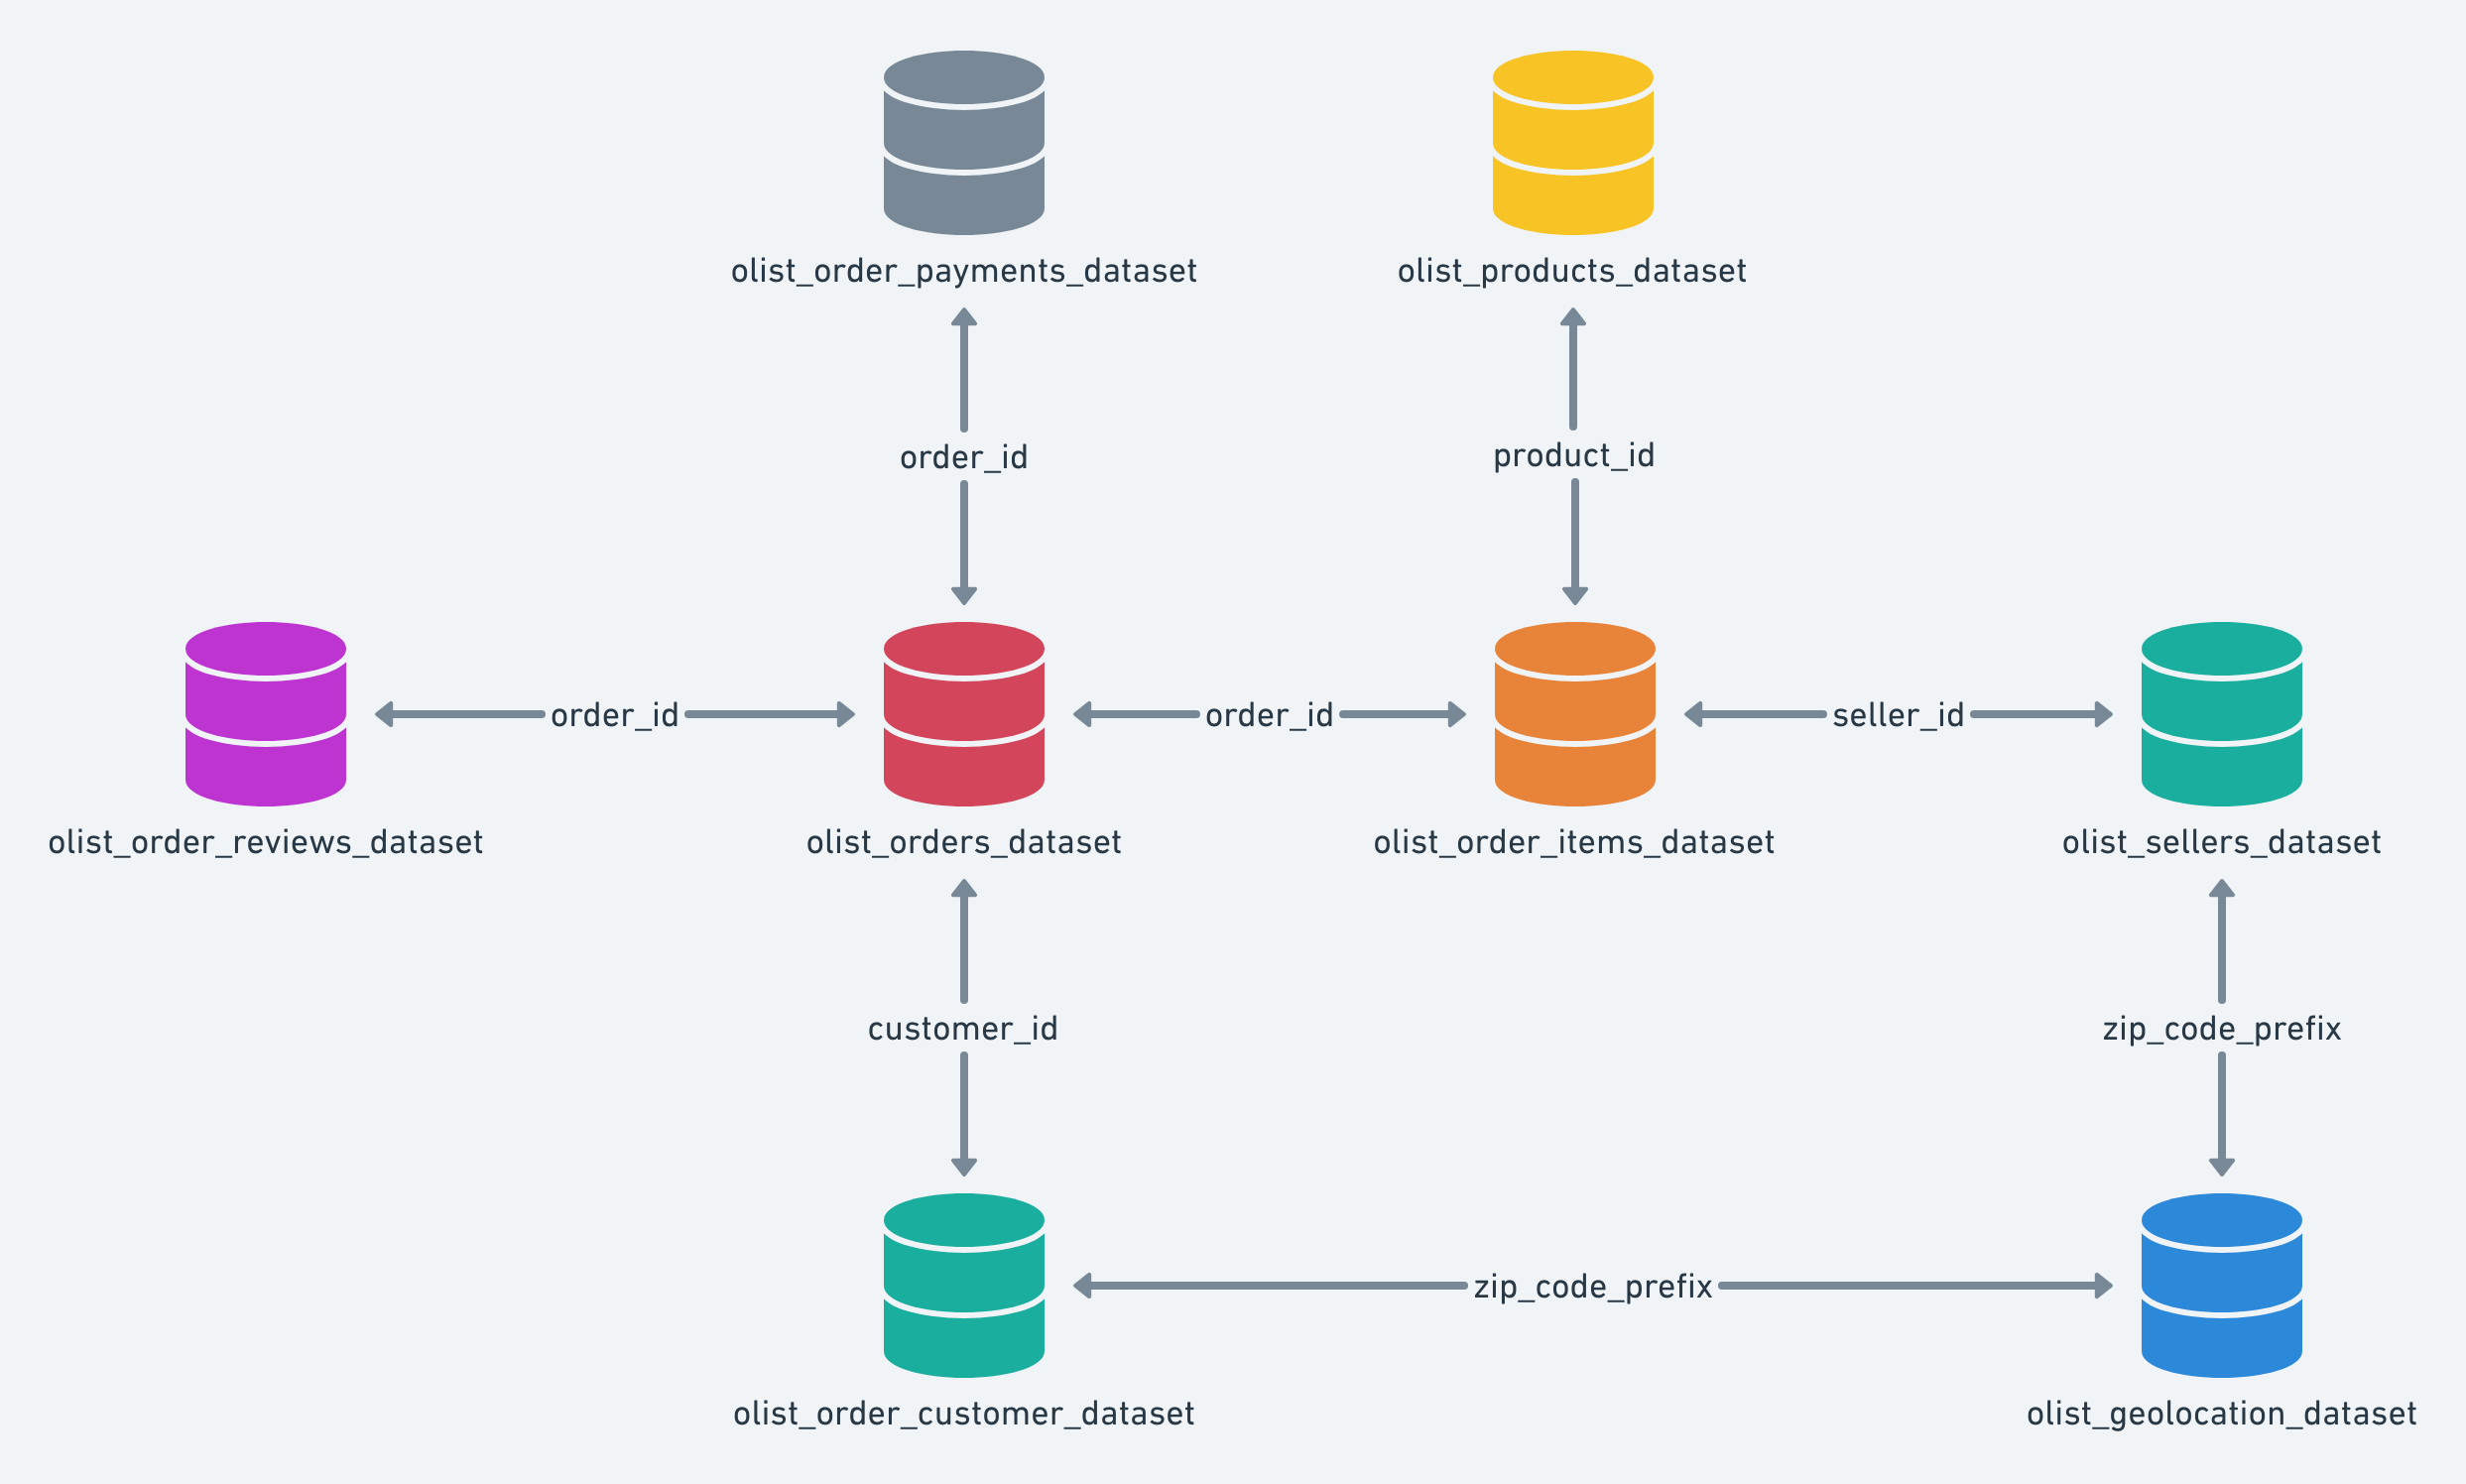

In [13]:
#zip_code_prefix column has different names in customer,geo_location,sellers dataframes
#Change these names to zip_code_prefix

customer.rename(columns = {"customer_zip_code_prefix":"zip_code_prefix"},inplace=True)
geo_location.rename(columns = {"geolocation_zip_code_prefix":"zip_code_prefix"},inplace=True)
sellers.rename(columns = {"seller_zip_code_prefix":"zip_code_prefix"},inplace=True)

In [14]:
#drop the duplicate values in geo_location (zip_code_prefix)

print("Number of rows before dropping duplicates in geo_location : ",geo_location.shape[0])
geo_location.drop_duplicates(subset="zip_code_prefix",keep="first",inplace=True)
print("Number of rows after dropping duplicates in geo_locations : ",geo_location.shape[0])

Number of rows before dropping duplicates in geo_location :  1000163
Number of rows after dropping duplicates in geo_locations :  19015


In [15]:
#customer merging with geo_location (left join to preserve customer info)
geo_customer     = pd.merge(customer,geo_location,how="left",on="zip_code_prefix")

#sellers merging with geo_locations (left join to preserve sellers info)
geo_seller       = pd.merge(sellers,geo_location,how="left",on="zip_code_prefix")

#payment merging with order
payment_order    = pd.merge(payments,orders,on="order_id")

#product merging with item
product_item     = pd.merge(products,items,on="product_id")

#payment_order merging with reviews
pay_order_review = pd.merge(payment_order,reviews,on="order_id")

#pay_order_review merging with geo_customer
review_customer  = pd.merge(pay_order_review,geo_customer,on="customer_id")

#prod_item merging with geo_seller
prod_item_seller = pd.merge(product_item,geo_seller,on="seller_id")

#Finally review_customer with prod_item_seller
data             = pd.merge(review_customer,prod_item_seller,on="order_id",suffixes=("_customer","_seller"))

In [16]:
print("Shape of the final dataframe (data) is : ",data.shape)

Shape of the final dataframe (data) is :  (118315, 47)


In [ ]:
num_tot_rows = data.shape[0]

<h2> 2.4 Data Cleaning </h2>

In [17]:
print("All the column names in the data : \n",data.columns)

All the column names in the data : 
 Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'zip_code_prefix_customer', 'customer_city', 'customer_state',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_city_customer', 'geolocation_state_customer', 'product_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_item_id', 'seller_id', 'shipping_limit_date', 'price',
       '

<b> We should only use the informations which are upto the product delivery. We don't use the review text, comment,review creation date like features for the prediction. Hence it is better to drop these columns now.</b>

In [18]:
data.drop(['review_id','review_comment_title', 'review_comment_message',
          'review_creation_date','review_answer_timestamp'],axis=1,inplace=True)

In [19]:
#Checking for nul values
data.isnull().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
review_score                        0
customer_unique_id                  0
zip_code_prefix_customer            0
customer_city                       0
customer_state                      0
geolocation_lat_customer          317
geolocation_lng_customer          317
geolocation_city_customer         317
geolocation_state_customer        317
product_id                          0
product_category_name            1709
product_name_lenght              1709
product_description_lenght       1709
product_photos_qty               1709
product_weig

In [20]:
data["order_status"].value_counts()

delivered      115728
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64

In [21]:
not_delivered = data[data["order_status"]!="delivered"]["order_status"].value_counts().sum()

print("Total number of orders which are not delivered : ",not_delivered)
print("percentage of orders which are not delivered : ", (not_delivered*100/data.shape[0]).round(3),"%")

Total number of orders which are not delivered :  2587
percentage of orders which are not delivered :  2.187 %


In [22]:
#We are interested in products that are delivered.
#We don't need the products which are not delivered yet/ cancelled. hence let's consider only delivered orders.
# Also there are only 2.2% of data which are not delivered. 

data = data[data["order_status"]=="delivered"]

In [23]:
#Since we cannot impute datetime, lets drop the rows which has null values in order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
#These columns has very little number of null values. 
data.dropna(subset=["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date"],axis=0,inplace=True)

In [24]:
data.isnull().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
review_score                        0
customer_unique_id                  0
zip_code_prefix_customer            0
customer_city                       0
customer_state                      0
geolocation_lat_customer          303
geolocation_lng_customer          303
geolocation_city_customer         303
geolocation_state_customer        303
product_id                          0
product_category_name            1637
product_name_lenght              1637
product_description_lenght       1637
product_photos_qty               1637
product_weig

There are 261 rows in which seller location informations are null. Similarly 303 rows in which customer locatons are null. <br>
We cannot impute these values, also these numbers are small, Hence we can drop these.

In [25]:
data.dropna(subset=["geolocation_lng_seller","geolocation_state_customer"],axis=0,inplace=True)

In [26]:
data.isnull().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
review_score                        0
customer_unique_id                  0
zip_code_prefix_customer            0
customer_city                       0
customer_state                      0
geolocation_lat_customer            0
geolocation_lng_customer            0
geolocation_city_customer           0
geolocation_state_customer          0
product_id                          0
product_category_name            1631
product_name_lenght              1631
product_description_lenght       1631
product_photos_qty               1631
product_weig

In [27]:
data.dropna(subset=["product_photos_qty","product_width_cm"],axis=0,inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113509 entries, 0 to 118314
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113509 non-null  object 
 1   payment_sequential             113509 non-null  int64  
 2   payment_type                   113509 non-null  object 
 3   payment_installments           113509 non-null  int64  
 4   payment_value                  113509 non-null  float64
 5   customer_id                    113509 non-null  object 
 6   order_status                   113509 non-null  object 
 7   order_purchase_timestamp       113509 non-null  object 
 8   order_approved_at              113509 non-null  object 
 9   order_delivered_carrier_date   113509 non-null  object 
 10  order_delivered_customer_date  113509 non-null  object 
 11  order_estimated_delivery_date  113509 non-null  object 
 12  review_score                  

In [29]:
data.shape

(113509, 42)

In [30]:
# % of data that we have drooped
print("Percentage of data that we have dropped is : ",round((num_tot_rows-data.shape[0])*100/num_tot_rows,3),"%")

Percentage of data that we have dropped is :  4.062 %


<b> So we have lost roughly 4% of data, which is not bad. Because we have 96% of data which don't have nul values.</b>

In [31]:
data[data.duplicated()==True]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,2017-12-12 12:13:20,89.90,17.88,13405,piracicaba,SP,-22.716839,-47.657366,piracicaba,SP
66,c0db7d31ace61fc360a3eaa34dd3457c,1,credit_card,5,65.71,80c0276f1c674e7b026d5a39799afaa4,delivered,2018-02-13 16:36:56,2018-02-13 16:50:30,2018-02-14 19:12:31,...,2018-02-22 15:50:30,56.99,8.72,9015,santo andre,SP,-23.665703,-46.518082,santo andre,SP
74,95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98,daddb546b42f656e57ba8a3cf71a309f,delivered,2018-07-19 11:54:25,2018-07-20 04:45:21,2018-07-23 08:22:00,...,2018-07-24 04:45:21,169.00,15.49,8820,mogi das cruzes,SP,-23.512628,-46.152698,mogi das cruzes,SP
75,95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98,daddb546b42f656e57ba8a3cf71a309f,delivered,2018-07-19 11:54:25,2018-07-20 04:45:21,2018-07-23 08:22:00,...,2018-07-24 04:45:21,169.00,15.49,8820,mogi das cruzes,SP,-23.512628,-46.152698,mogi das cruzes,SP
188,14d9794bbb53614d12cc2df6a045f82b,1,boleto,1,116.70,666a4eb7699fdccd19518171e0b5a069,delivered,2018-01-14 21:10:48,2018-01-16 03:38:48,2018-01-16 17:36:57,...,2018-01-26 03:38:48,99.56,17.14,87025,maringa,PR,-23.377397,-51.931006,maringa,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116252,b9eb9fbcca54dfce1d087c752d0f4b35,1,boleto,1,35.01,3824319059ed4febc68d625e63f29eee,delivered,2017-10-11 10:23:09,2017-10-12 03:00:12,2017-10-16 22:52:14,...,2017-10-24 04:00:12,18.90,16.11,4773,sao paulo,SP,-23.681543,-46.707806,sao paulo,SP
117353,f7c5c5ff5045e13c98901bbbf8e871d4,1,credit_card,10,231.27,1d5f7303f8a2248f42cf919af8d77cc3,delivered,2017-07-26 18:22:31,2017-07-26 18:38:51,2017-07-28 17:35:33,...,2017-08-02 18:36:24,205.00,26.27,4248,sao paulo,SP,-23.614118,-46.600348,sao paulo,SP
117453,169ab175fb915582d84c0c5c95bb0fe3,1,credit_card,10,741.10,fe02528abe9cf5b73ededc4a240acc9d,delivered,2018-06-09 08:51:19,2018-06-09 09:11:28,2018-06-15 11:32:00,...,2018-06-14 09:11:28,662.73,78.37,25963,teresopolis,RJ,-22.416150,-42.977023,teresopolis,RJ
117624,03515a836bb855b03f7df9dee520a8fc,1,credit_card,10,106.38,153e6d880db3cac30ecfeb13e0047841,delivered,2018-01-19 13:24:38,2018-01-19 13:36:01,2018-01-19 21:47:56,...,2018-01-29 13:36:01,89.99,16.39,9015,santo andre,SP,-23.665703,-46.518082,santo andre,SP


In [32]:
#remove the duplicates
data.drop_duplicates(keep="first",inplace=True)

In [33]:
data.shape

(113108, 42)

In [34]:
#lets change the datetime features to correct format
data["order_purchase_timestamp"]       = pd.to_datetime(data["order_purchase_timestamp"])
data["order_approved_at"]              = pd.to_datetime(data["order_approved_at"])
data["order_delivered_carrier_date"]   = pd.to_datetime(data["order_delivered_carrier_date"])
data["order_delivered_customer_date"]  = pd.to_datetime(data["order_delivered_customer_date"])
data["order_estimated_delivery_date"]  = pd.to_datetime(data["order_estimated_delivery_date"])
data["shipping_limit_date"]            = pd.to_datetime(data["shipping_limit_date"])


#### <font color="red">I found some problem with seller_city, seller_state information in sellers dataframe.

In [35]:
data[data["geolocation_state_seller"]!=data["seller_state"]]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller
53,1dcf0c8cd36ffaf57784fbdc90079310,1,credit_card,3,157.15,34955e04695a861e22cfc5600244118d,delivered,2018-04-19 21:16:39,2018-04-19 21:31:03,2018-04-24 17:17:41,...,2018-04-25 21:31:03,99.90,57.25,27277,volta redonda,SP,-22.498183,-44.123614,volta redonda,RJ
238,591083bc42b589c7052118aa83118e76,5,voucher,1,20.00,276df8efcf9602ecddaa00e349eb79b3,delivered,2018-01-02 22:09:17,2018-01-02 22:19:30,2018-01-03 21:10:00,...,2018-01-08 22:19:30,24.95,28.42,88301,itajai,SP,-26.916270,-48.652460,itajaí,SC
240,591083bc42b589c7052118aa83118e76,3,voucher,1,20.00,276df8efcf9602ecddaa00e349eb79b3,delivered,2018-01-02 22:09:17,2018-01-02 22:19:30,2018-01-03 21:10:00,...,2018-01-08 22:19:30,24.95,28.42,88301,itajai,SP,-26.916270,-48.652460,itajaí,SC
242,591083bc42b589c7052118aa83118e76,2,voucher,1,20.00,276df8efcf9602ecddaa00e349eb79b3,delivered,2018-01-02 22:09:17,2018-01-02 22:19:30,2018-01-03 21:10:00,...,2018-01-08 22:19:30,24.95,28.42,88301,itajai,SP,-26.916270,-48.652460,itajaí,SC
244,591083bc42b589c7052118aa83118e76,6,voucher,1,15.21,276df8efcf9602ecddaa00e349eb79b3,delivered,2018-01-02 22:09:17,2018-01-02 22:19:30,2018-01-03 21:10:00,...,2018-01-08 22:19:30,24.95,28.42,88301,itajai,SP,-26.916270,-48.652460,itajaí,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117074,d3037ef55ee7f4d6c892da7493f4912f,1,credit_card,5,154.47,a92c7dc386e43df776cae3f8c5bc3d25,delivered,2017-05-17 16:12:44,2017-05-17 16:22:22,2017-05-22 14:42:54,...,2017-05-23 16:22:22,139.90,14.57,27277,volta redonda,SP,-22.498183,-44.123614,volta redonda,RJ
117345,15cd24278cb6a373aa6bb2ca34837e16,1,boleto,1,24.60,61a5483d57f486f4177687846c31bcff,delivered,2018-01-28 22:17:22,2018-01-30 05:31:45,2018-01-30 15:49:00,...,2018-02-05 04:31:06,10.50,14.10,88075,florianopolis,SP,-27.589171,-48.579840,florianopolis,SC
117599,cab69d0a36811c4945aec2d4f744c8b5,1,credit_card,10,230.19,2468eac8daf0e31ed4c5df419b32edb8,delivered,2018-06-16 21:53:42,2018-06-17 21:53:43,2018-06-19 14:59:00,...,2018-06-21 21:53:43,199.00,31.19,83020,sao jose dos pinhais,SP,-25.550487,-49.189967,sao jose dos pinhais,PR
117658,652dd239023471248957a1a2d5173b60,1,credit_card,3,140.44,35cc89fc7a4a108e58af6d20943348d6,delivered,2018-08-08 20:41:24,2018-08-08 20:55:24,2018-08-09 14:52:00,...,2018-08-10 20:55:24,116.90,23.54,31570,belo horizonte,SP,-19.810119,-43.984727,belo horizonte,MG


<b> There are 653 record in which seller_state and geo_location_state_seller are not matching. 
    
So, let us look deeply about this issue.

In [36]:
geo_location[(geo_location["geolocation_state"]=="SC") & (geo_location["geolocation_city"]=="itajai")]

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
909293,88310,-26.891052,-48.701608,itajai,SC
909296,88309,-26.895500,-48.687952,itajai,SC
909297,88306,-26.935823,-48.627747,itajai,SC
909300,88311,-26.877642,-48.705441,itajai,SC
909307,88302,-26.920172,-48.657852,itajai,SC
909318,88317,-26.876740,-48.750403,itajai,SC
909319,88308,-26.928509,-48.700390,itajai,SC
909322,88303,-26.912429,-48.677381,itajai,SC
909332,88304,-26.899380,-48.679729,itajai,SC
909374,88312,-26.908691,-48.703615,itajai,SC


In [37]:
geo_location[(geo_location["geolocation_state"]=="SP") & (geo_location["geolocation_city"]=="itajai")]

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [38]:
sellers[(sellers["seller_state"]=="SP") & (sellers["seller_city"]=="itajai")]

,seller_id,zip_code_prefix,seller_city,seller_state
1303,0bae85eb84b9fb3bd773911e89288d54,88301,itajai,SP
1449,52b53f7061969fe471d119b6195da864,88301,itajai,SP


<b>So, I googled the actual city of itajai, Brazil. Actually state is SC (Santa Catarina). Not SP (São Paulo). 

So,sellers data contains wrong information about this. 
    
geo_location is accurate.
    
Hence it is better to drop seller_state, seller_city, since we have the correct information in geolocation data.i.e. geolocation_state_seller, geo_location_city_seller.

Since seller data has some wrong info, let us check customer data also.

In [39]:
data[data["geolocation_state_customer"] != data["customer_state"]]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller


In [40]:
data[data["geolocation_city_customer"]!=data["customer_city"]][["geolocation_city_customer","customer_city"]]

,geolocation_city_customer,customer_city
57,jaguariúna,jaguariuna
58,guaraí,guarai
59,guaraí,guarai
60,guaraí,guarai
76,são lourenço,sao lourenco
...,...,...
118147,picuí,picui
118157,brasília,brasilia
118250,são paulo,sao paulo
118273,maringá,maringa


<b>We can see that customer_state and geolocation_customer_state are same. 

But in city names, customer_city names are in english. But geolocation_city_customer has different notation. But names are same. Here we shall drop customer_city, since geolocation_city_customer has same notations as all seller_city has.

In [41]:
data.drop(["seller_state","seller_city","customer_city","customer_state"],axis=1,inplace=True)

data.rename(columns =
                    {"geolocation_state_seller":"seller_state","geolocation_city_seller":"seller_city",
                    "geolocation_lng_seller":"lng_seller","geolocation_lat_seller":"lat_seller",
                    "geolocation_lng_customer":"lng_customer","geolocation_lat_customer":"lat_customer",
                    "geolocation_city_customer":"customer_city","geolocation_state_customer":"customer_state"}
            ,inplace=True)

<b><font color="red"> There are 3 records in the data, which has 0 installment. This is weird. Also these 3 records present in rating 5. 
    
Let us drop these 3 records with installment = 0.

In [42]:
data[data["payment_installments"]==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state
56288,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69,5e5794daaa13f73e2f1cdb4114529843,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,...,1,7202e2ba20579a9bd1acb29e61fe71f6,2018-04-26 12:31:06,45.90,12.79,14401,-20.530671,-47.398519,franca,SP
91637,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,...,1,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28,31573,-19.809042,-43.990070,belo horizonte,MG
91638,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,...,2,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28,31573,-19.809042,-43.990070,belo horizonte,MG


In [43]:
data.drop(data.index[[53769,87577,87578]],axis=0,inplace=True)

In [44]:
data[data["payment_installments"]==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state


### map the product_category translation to data

In [45]:
data = pd.merge(data,translation,how="left",on="product_category_name")

In [46]:
data[data["product_category_name_english"].isnull()==True]["product_category_name"].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    14
pc_gamer                                          9
Name: product_category_name, dtype: int64

In [47]:
translation[translation["product_category_name"]=="portateis_cozinha_e_preparadores_de_alimentos"]

,product_category_name,product_category_name_english


<b> Translation data deos not has portateis_cozinha_e_preparadores_de_alimentos, pc_gamer.
    
portateis_cozinha_e_preparadores_de_alimentos english translation is kitchen_laptops_and_food_preparators
    
pc_gamer is pc_gamer. 
    
Let us fill the null values in english translation by these values.

In [48]:
null_1 = data[data["product_category_name"]=="portateis_cozinha_e_preparadores_de_alimentos"]["product_category_name_english"]
null_2 = data[data["product_category_name"]=="pc_gamer"]["product_category_name_english"]

In [49]:
data.loc[null_1.index,"product_category_name_english"] = "kitchen_laptops_and_food_preparators"
data.loc[null_2.index,"product_category_name_english"] = "pc_gamer"

In [50]:
data.drop("product_category_name",inplace=True,axis=1)
data.rename(columns={"product_category_name_english":"product_category_name"},inplace=True)

In [51]:
#let us save the data as final_data.csv, so that we do not need to run the above cells again.
data.to_csv("final_data.csv")

## Exploratory Data Analysis

In [52]:
#load the data
data = pd.read_csv("final_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)

In [53]:
#info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113105 entries, 0 to 113104
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113105 non-null  object 
 1   payment_sequential             113105 non-null  int64  
 2   payment_type                   113105 non-null  object 
 3   payment_installments           113105 non-null  int64  
 4   payment_value                  113105 non-null  float64
 5   customer_id                    113105 non-null  object 
 6   order_status                   113105 non-null  object 
 7   order_purchase_timestamp       113105 non-null  object 
 8   order_approved_at              113105 non-null  object 
 9   order_delivered_carrier_date   113105 non-null  object 
 10  order_delivered_customer_date  113105 non-null  object 
 11  order_estimated_delivery_date  113105 non-null  object 
 12  review_score                  

<h3> Let us check the distribution of class label to understand the class balance

Counts :
  5    64637
4    21725
1    13241
3     9573
2     3929
Name: review_score, dtype: int64
************************************************************
Percentage distribution :
  5    57.147783
4    19.207816
1    11.706821
3     8.463817
2     3.473763
Name: review_score, dtype: float64
************************************************************


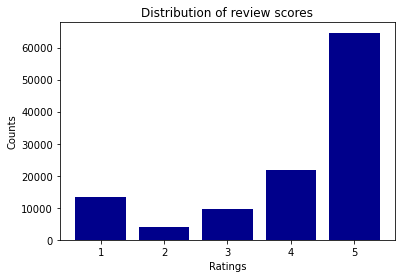

In [54]:
# checking the balance of the data
print("Counts :\n ",data["review_score"].value_counts())
print("**"*30)
print("Percentage distribution :\n ",100*data["review_score"].value_counts(normalize=True))
print("**"*30)

plt.bar(data["review_score"].value_counts().index,data["review_score"].value_counts(),color="darkblue")

plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.title("Distribution of review scores")
plt.show()

<b> We can see that review scores distributed in <font color="blue">J</font> like shape. This is the typical distribution of e-commerce review scores. Very high number of rating 5 followed by 4 and then rating 1, rating 2 and 3 are less compared to other ratings.<b>

<b><font color="red"> The dataset is highly imbalanced.</font>
    
There are only 3.5% datapoints which belongs to rating 2.
    
About 57% of datapoints belongs to rating 5. </b>

### Correlation between features

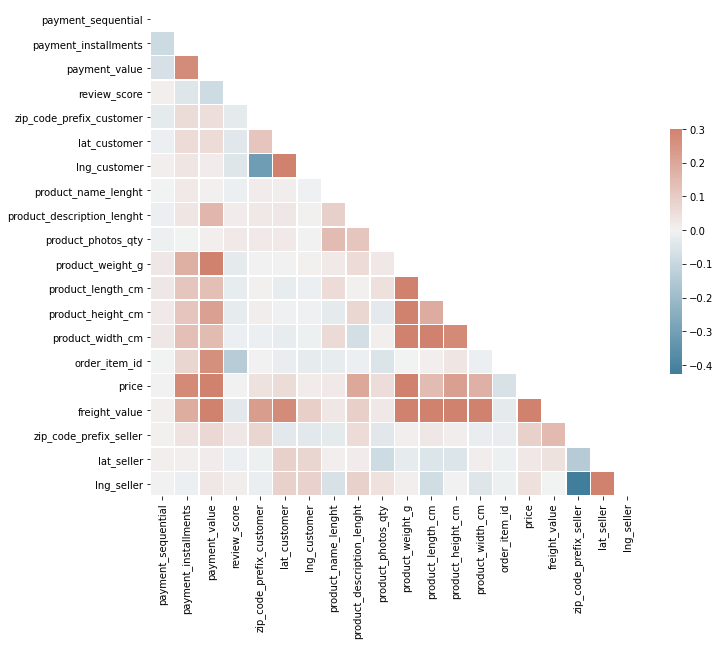

In [55]:
#Reference documentation: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

correlation = data.corr()
#mask the above triangle
mask = np.triu(np.ones_like(correlation,dtype='bool'))
f, ax = plt.subplots(figsize=(11, 9))
#colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#heatmap using seaborn
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### We are interested in correlation of features with (target variable) review_score

In [56]:
data.corr()["review_score"]

payment_sequential            0.007774
payment_installments         -0.043959
payment_value                -0.083140
review_score                  1.000000
zip_code_prefix_customer     -0.027236
lat_customer                 -0.037309
lng_customer                 -0.042775
product_name_lenght          -0.013654
product_description_lenght    0.014226
product_photos_qty            0.021811
product_weight_g             -0.027676
product_length_cm            -0.020965
product_height_cm            -0.023773
product_width_cm             -0.012380
order_item_id                -0.138087
price                         0.002252
freight_value                -0.034503
zip_code_prefix_seller        0.026792
lat_seller                   -0.009388
lng_seller                    0.012411
Name: review_score, dtype: float64

It seems that none of the existing numerical features are highly correlated with the target variable.

Surprisingly price is very very less correlated with the review scoring. Similarly freight value.

## 2.4 Univariate analysis

In [57]:
#let us split the data with respect to review rating. 

In [58]:
rate_1 = data[data["review_score"]==1] 
rate_2 = data[data["review_score"]==2] 
rate_3 = data[data["review_score"]==3] 
rate_4 = data[data["review_score"]==4] 
rate_5 = data[data["review_score"]==5] 

### 2.4.1 payment_type analysis with review_score

In [59]:
#let us check some relation in type and sequential and installments

In [60]:
data[(data["payment_type"]!="voucher") & (data["payment_sequential"]>3)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name


In [61]:
data[(data["payment_sequential"]>3) & (data["payment_installments"]>1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name


In [62]:
data[(data["payment_type"]=="voucher") & (data["payment_installments"]>1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name


* For payment sequential more than 3, all the payment methods are voucher.
* payment installments more than 1 present for payment_sequential 1, 2, 3. For payment_sequential more than 3, there is only one installment.
* For all voucher payment methods, installment is 1. 

In [66]:
print(data["payment_type"].value_counts(normalize=True))

credit_card    0.737854
boleto         0.194580
voucher        0.053225
debit_card     0.014341
Name: payment_type, dtype: float64


In [67]:
#payment_type grouped by review_score
pay_type_score = data.groupby("review_score")["payment_type"].value_counts(normalize=True)
pay_type_score.unstack()

payment_type,boleto,credit_card,debit_card,voucher
review_score,,,,
1,0.195227,0.740427,0.011253,0.053093
2,0.186561,0.734284,0.013489,0.065666
3,0.201922,0.731954,0.012744,0.053379
4,0.198113,0.736110,0.013763,0.052014
5,0.192661,0.739004,0.015456,0.052880


<b> Distribution of different payment types in each review rating is almost same as in the original data.

Each of the ratings has nearly 74% of credit card payment. Roughly 1.2%-1.4% debit card payment. 

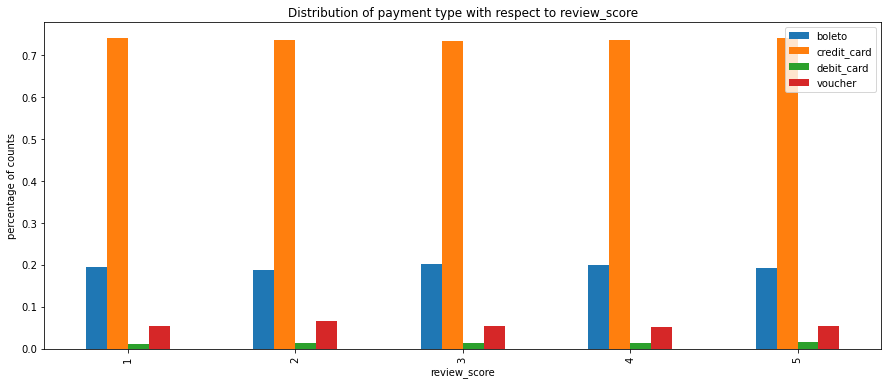

In [68]:
pay_type_score.unstack().plot.bar(figsize=(15,6)).legend(loc="best")
plt.ylabel("percentage of counts")
plt.title("Distribution of payment type with respect to review_score")
plt.show()

<b> From the plot also we can see that, the distribution is same

<b> Let us test statistically, whether payment_type and review_score dependent or independent.

<b> Chi-square test with significance level alpha=0.05

<font color="darkblue"><b> Null hypothesis :</b> payment_type and review_score are not related i.e. independent
    
<b><font color="darkblue"> Althernative hypothesis: </b> payment_type and review_score are related i.e. dependent

In [69]:
#reference: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
from scipy.stats import chi2_contingency,chi2

#creating contengency table
table = pd.crosstab(data["payment_type"],data["review_score"],margins=False)

#chi_square test using scipy.stats library
chi_2,p_value,dof,expected = chi2_contingency(table)

In [70]:
alpha = 0.05
print("Level of significance : ",alpha)
print("p-value is : ",p_value)

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")
print("*"*30)    
#interpreting test statistic    
prob=0.95
critical = chi2.ppf(prob, dof)

print("Critical value is : ",critical)
print("chi2(test statistic) value is : ",chi_2)

if chi_2>=critical:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")
    

Level of significance :  0.05
p-value is :  0.00027649502286312483
Reject null hypothesis
******************************
Critical value is :  21.02606981748307
chi2(test statistic) value is :  36.42753432616247
Reject null hypothesis


<b> <font color="darkblue">Hence we can conclude that dependence of review_score on payment_type is statistically significant

### 2.4.2 payment_installments analysis with review_score

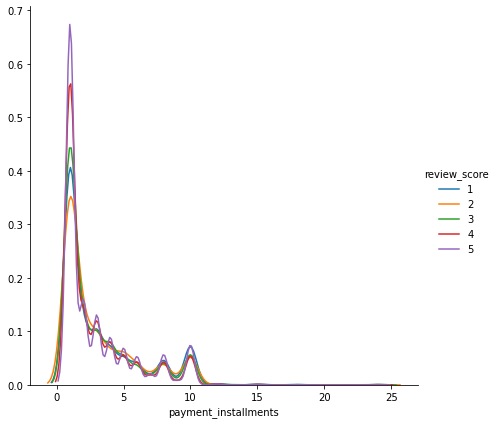

In [71]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"payment_installments")\
    .add_legend()
plt.show()

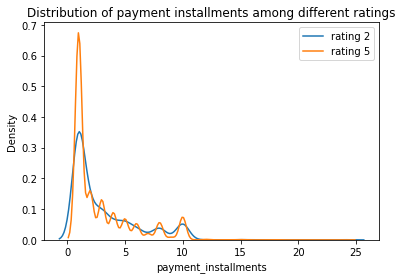

In [72]:
#distribution between rating 2 and rating 5
sns.kdeplot(rate_2["payment_installments"],label="rating 2")
sns.kdeplot(rate_5["payment_installments"],label="rating 5")

plt.title("Distribution of payment installments among different ratings")
plt.legend()
plt.show()

* Distributions are not separable. 
* Density is peak at installments 1 for rating 5 compared to rating 2.

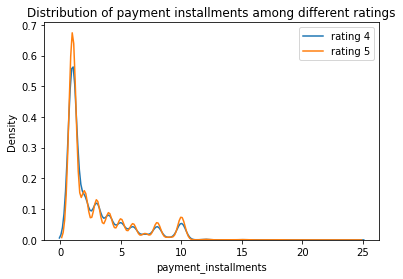

In [73]:
#distribution between rating 4 and rating 5
sns.kdeplot(rate_4["payment_installments"],label="rating 4")
sns.kdeplot(rate_5["payment_installments"],label="rating 5")

plt.title("Distribution of payment installments among different ratings")
plt.legend()
plt.show()

* Installment distribution of rating 4 is highly overlapping with the same of rating 5

* From the density distribution of installments we can see that, ratings are not separable using installments alone.
* Distribution plots are highly overlapped. 

<b> Since this distributon looks like follow power law, let us consider log scale.

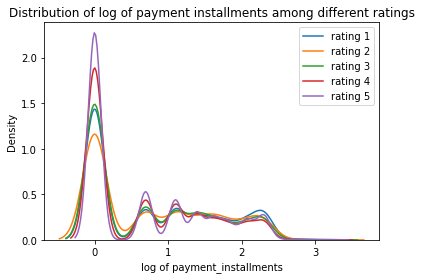

In [74]:
sns.kdeplot(np.log(rate_1["payment_installments"]),label="rating 1")
sns.kdeplot(np.log(rate_2["payment_installments"]),label="rating 2")
sns.kdeplot(np.log(rate_3["payment_installments"]),label="rating 3")
sns.kdeplot(np.log(rate_4["payment_installments"]),label="rating 4")
sns.kdeplot(np.log(rate_5["payment_installments"]),label="rating 5")

plt.title("Distribution of log of payment installments among different ratings")
plt.xlabel("log of payment_installments")
plt.legend()
plt.show()

* Most of the installments = 1 in all ratings.
* Distribution of installments is almost similar among all the ratings.
* payment_installment alone cannot distinguish among the ratings.

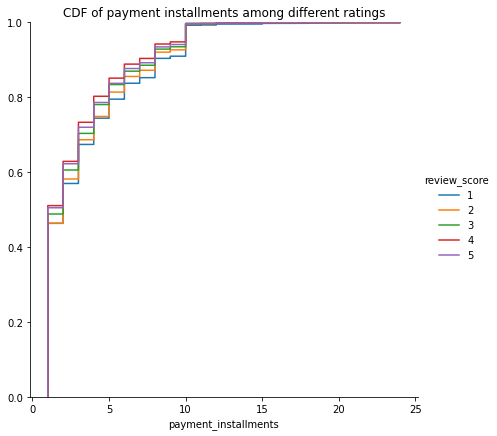

In [75]:
#plotting cdf
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.ecdfplot,"payment_installments")\
    .add_legend()


plt.title("CDF of payment installments among different ratings")
plt.xlabel("payment_installments")
plt.show()

* We cannot say anything more from cdf also.
* Plots are overlapped. payment_installment is discrete value. At each value the percentage of data lies below is almost same for all ratings.

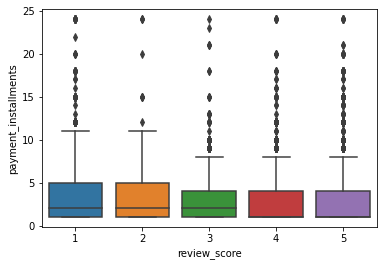

In [76]:
#boxplot
sns.boxplot(y="payment_installments",x="review_score",data=data)
plt.show()

In [77]:
#mean installments
data.groupby("review_score")["payment_installments"].mean()

review_score
1    3.292425
2    3.149147
3    2.982451
4    2.807089
5    2.898294
Name: payment_installments, dtype: float64

In [78]:
#99.9% installments
data.groupby("review_score")["payment_installments"].apply(lambda x: np.percentile(x,99.9))

review_score
1    24.00
2    15.36
3    15.00
4    15.00
5    15.00
Name: payment_installments, dtype: float64

* Obviously the first observation is box plot of all ratings overlapped.
* There are outliers in the payment_installments. 
* becuase, from the boxplot we can see that 75% of data lies below payment_installments less than 5. 
* There are very very less datapoints which have installments greater than 10 in each ratings. 
* Median of rating 1,2,3 are almost same that is equal to 2. Whereas for rating 4 and 5, median is 1.

* Most of the datapoints (75%) which has rating 3, 4 or 5, have installments below 4. The same for rating 2 and 1, is 5.
* Average payment installments for rating 1 and 2 are slightly high compared to rating 3,4,5. But the difference is not significant.

* 99.9% of data points are below installments = 15 in case of ratings 2,3,4,5. Where is 99.9 percentile of rating 1 is 24.

### 2.4.3 payment_sequential analysis with review_score

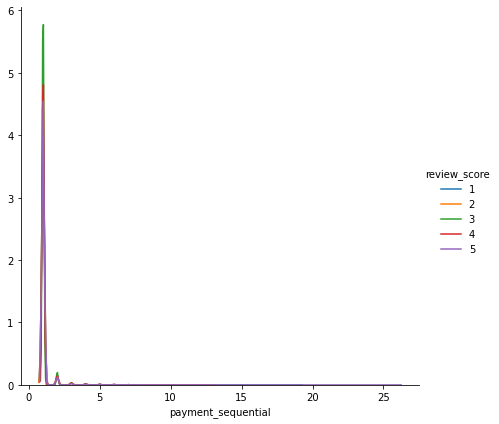

In [79]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"payment_sequential")\
    .add_legend()
plt.show()

<b> it seems that density of payment_sequential of rating 3 is high at payment_sequential = 1 compared to other ratings.
But let us check this

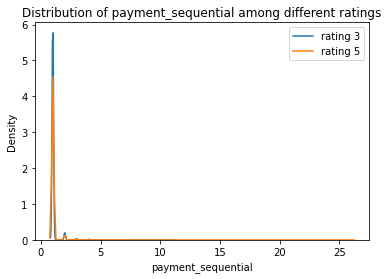

In [80]:
sns.kdeplot((rate_3["payment_sequential"]),label="rating 3")
sns.kdeplot((rate_5["payment_sequential"]),label="rating 5")

plt.title("Distribution of payment_sequential among different ratings")
plt.xlabel("payment_sequential")
plt.legend()
plt.show()

<b> Yes!! Density of rating 3 at payment_sequential=1 is peaked comapared to the same of rating 5. 

<b> Distribution of payment_sequential is highly overlapped in all the ratings data. From this we can clearly see that we cannot distinguish among the ratings. 
    
Here also we cannot get any helpful information from payment_sequential alone

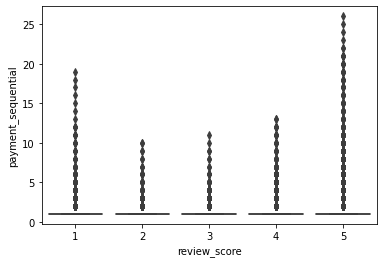

Mean 
 review_score
1    1.085945
2    1.095444
3    1.062572
4    1.085432
5    1.096787
Name: payment_sequential, dtype: float64
99.9 percentile 
 review_score
1    1.0
2    2.0
3    1.0
4    1.0
5    1.0
Name: payment_sequential, dtype: float64


In [81]:
sns.boxplot(y="payment_sequential",x="review_score",data=data)
plt.show()

#mean installments
print("Mean \n",data.groupby("review_score")["payment_sequential"].mean())

#99.9% installments
print("99.9 percentile \n",data.groupby("review_score")["payment_sequential"].apply(lambda x: np.percentile(x,95)))

* payment_sequential is also discrete feature. Its value is ranging between 1 to 26.
* From the boxplot we can see that, there are very less values of sequential greater than 1 in each rating. So these are considered as outliers in the boxplot.
* Mean value for each rating is almost same. There is no difference among the mean values.
* From 99.9 percentile value, we can clearly say that, 99.9% of data points contains sequential = 1 for all ratings except for rating 2(sequential is 2)
* It is clear that payment_sequential alone cannot give any information to distinguish among ratings. Than means it does not has significant effect on review_rating.

### 2.4.4 payment_value analysis with review_score

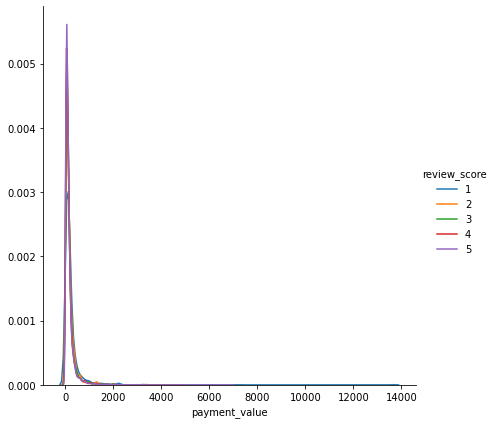

In [82]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"payment_value")\
    .add_legend()
plt.show()

In [83]:
#above density plot is overlapped. So we cannot get much insight from this. let us have a look at numbers.

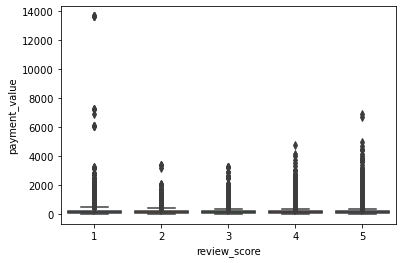

Mean 
 review_score
1    238.378781
2    185.442909
3    168.537174
4    164.140398
5    161.243232
Name: payment_value, dtype: float64
99.9 percentile 
 review_score
1    464.890
2    372.840
3    334.414
4    323.900
5    317.850
Name: payment_value, dtype: float64


In [84]:
sns.boxplot(y="payment_value",x="review_score",data=data)
plt.show()

#mean payment_value
print("Mean \n",data.groupby("review_score")["payment_value"].mean())

#90% payment_value
print("90 percentile \n",data.groupby("review_score")["payment_value"].apply(lambda x: np.percentile(x,90)))

* Mean values of payment_values of rating 5,4,3 are much less compared to the same of rating 1. 
* But from the boxplot we can see that there are outliers with high payment values in rating 1. So this might pull the mean value of rating 1 towards higher value.
* 90th percentile value is also high for rating 1 compared to other.

In [85]:
rate_1[rate_1["payment_value"]>12000]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name
59174,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony
59175,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony
59176,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony
59177,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony
59178,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony
59179,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony
59180,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony
59181,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,3667,-23.532047,-46.496814,sao paulo,SP,fixed_telephony


* Now we can see that one customer purchased same item 8 units in the sam time. The payment value is 13664.08.
* He gave 1 rating for all this product. This high value affects the mean value of payment value.

<b>We need to check more percentile values.

In [86]:
for i in range(95,100):
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["payment_value"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

95th percentile 
 review_score
1    738.570
2    557.068
3    508.304
4    483.392
5    468.000
Name: payment_value, dtype: float64
****************************************
96th percentile 
 review_score
1    854.1020
2    622.2800
3    581.2500
4    567.2632
5    545.1400
Name: payment_value, dtype: float64
****************************************
97th percentile 
 review_score
1    1014.0200
2     696.9852
3     682.8300
4     660.4096
5     637.4604
Name: payment_value, dtype: float64
****************************************
98th percentile 
 review_score
1    1342.98
2     939.72
3     835.55
4     838.97
5     783.00
Name: payment_value, dtype: float64
****************************************
99th percentile 
 review_score
1    1853.0000
2    1308.1800
3    1076.7600
4    1150.0428
5    1071.1200
Name: payment_value, dtype: float64
****************************************


* From 95 to 99 percentile, payment value of rating 5,4,3 is significantly less rating 1. 
* For 95th percentile, rating 5 has less payment value compared to rating 1.

<b>Since there are some very larger values in each rating, lets check other percentiles.

In [87]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["payment_value"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    137.57
2    119.29
3    107.78
4    104.61
5    104.43
Name: payment_value, dtype: float64
****************************************
75th percentile 
 review_score
1    241.22
2    212.32
3    188.34
4    182.29
5    180.16
Name: payment_value, dtype: float64
****************************************
80th percentile 
 review_score
1    284.550
2    247.640
3    218.270
4    208.632
5    207.278
Name: payment_value, dtype: float64
****************************************
85th percentile 
 review_score
1    350.220
2    297.950
3    260.140
4    249.670
5    244.806
Name: payment_value, dtype: float64
****************************************


* Median payment value is also high incase of rating 1 compared to other ratings. 

From these observations,
<b> We can say, payment value has effect on review_score. 
    
Customers who bought products of very high values most likely to give low ratings. 
    
But this does not prove causation. 
    
This is the insights we got from the above numbers.   